In [100]:
# Libaries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [101]:
#1. Get the data and clean table:
customer_df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\06_Advanced_Statistics\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(customer_df)
# 9134 x 24

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [102]:
#2. Deal with NaNs
sum_na = customer_df.isna().sum()
print (sum_na)
#-> no NaNs in the df

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [103]:
#3. Change effective_to_date column to datetime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
data_types = customer_df.dtypes
print (data_types)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [104]:
#4. Get numeric columns

def column_types(data):
    num_col = data.select_dtypes(include=['int', 'float', 'datetime64']).columns
    cat_col = data.select_dtypes(include=['object']).columns
    return num_col, cat_col

numerical_columns, categorical_columns = column_types(customer_df)

numerical_df = customer_df[numerical_columns]
categorical_df = customer_df[categorical_columns]
# 9134 x 9

In [105]:
#5. Differentiate between continious and discrete values (function)

def dicision(data, threshold=250):
    continuous_cols = []
    discrete_cols = []
    for column in data.columns:
        unique_count = data[column].nunique()
        if unique_count <= threshold:
            discrete_cols.append(column)
        else:
            continuous_cols.append(column)
    return continuous_cols, discrete_cols

continuous_columns, discrete_columns = dicision(numerical_df)
print("Continuous columns:")
print(continuous_columns)
print("\nDiscrete columns:")
print(discrete_columns)

continuous_df = numerical_df[continuous_columns]
discrete_df = numerical_df[discrete_columns]

Continuous columns:
['customer_lifetime_value', 'income', 'total_claim_amount']

Discrete columns:
['effective_to_date', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


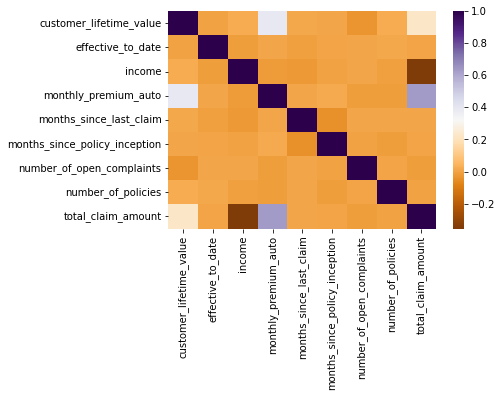

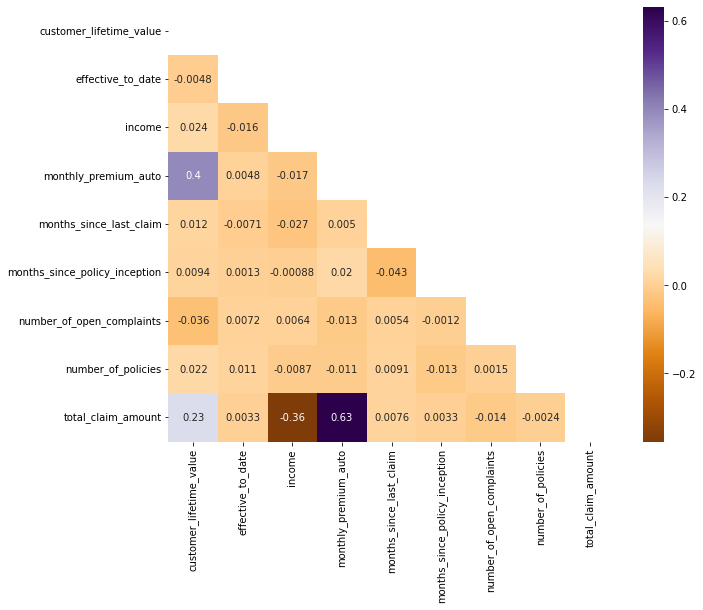

,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2011-02-24,56274,69,32,5,0,1,384.811147
1,2011-01-31,0,94,13,42,0,8,1131.464935
2,2011-02-19,48767,108,18,38,0,2,566.472247
3,2011-01-20,0,106,18,65,0,7,529.881344
4,2011-02-03,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,2011-02-10,71941,73,18,89,0,2,198.234764
9130,2011-02-12,21604,79,14,28,0,1,379.200000
9131,2011-02-06,0,85,9,37,3,2,790.784983
9132,2011-02-03,21941,96,34,3,0,3,691.200000


In [106]:
#6. Correlation matrix
df_corr = numerical_df.corr()

sns.heatmap(df_corr, annot=False, cmap="PuOr")
plt.show()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr, mask=mask, annot=True, cmap="PuOr")
plt.show()

'''
Interpretation:
- There seems to be multicollinearity between customer_lifetime_value and monthly_premium_auto if 'total_claim_amount' is
    the target.
--> drop customer_lifetime_value from the numerical_df
'''

numerical_df = numerical_df.drop('customer_lifetime_value', axis = 1)
numerical_df

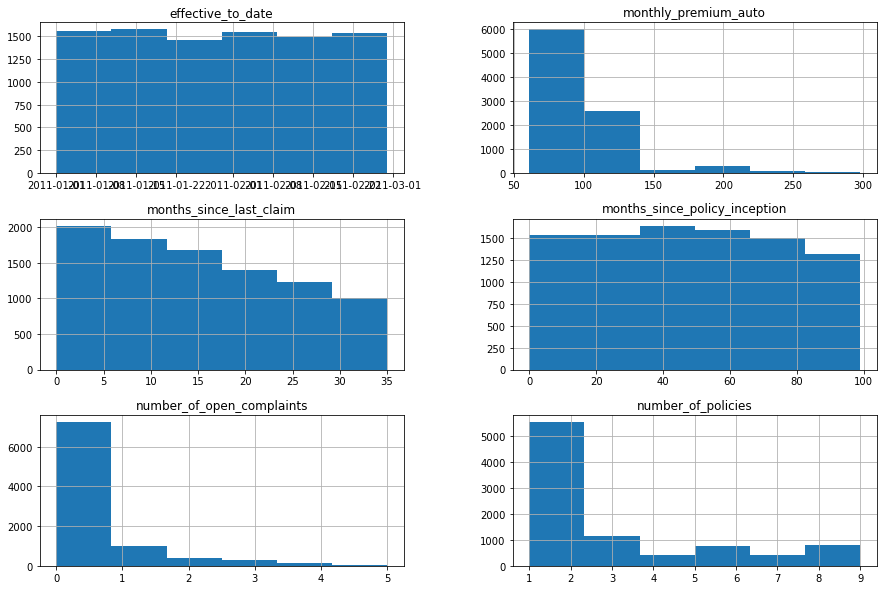

In [107]:
#7. Plot all discrete variables

#7.1 Histplots
discrete_df.hist(bins=6, figsize=(15, 10))
plt.show()

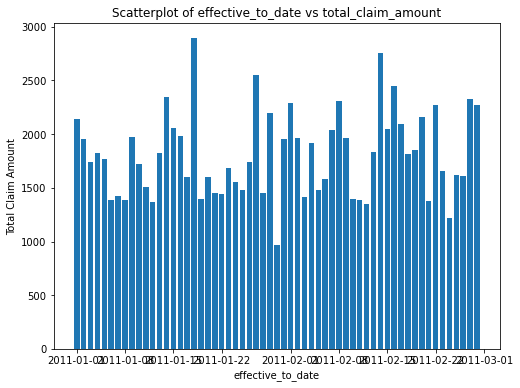

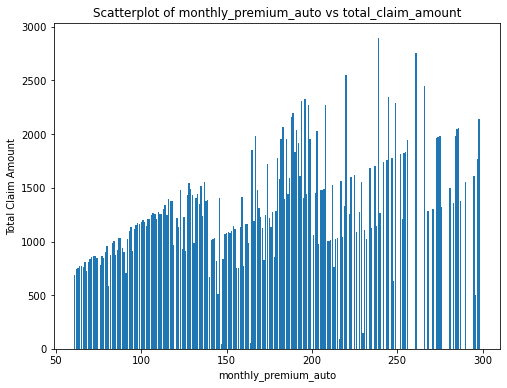

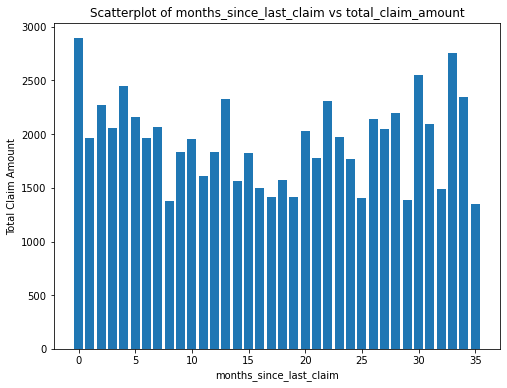

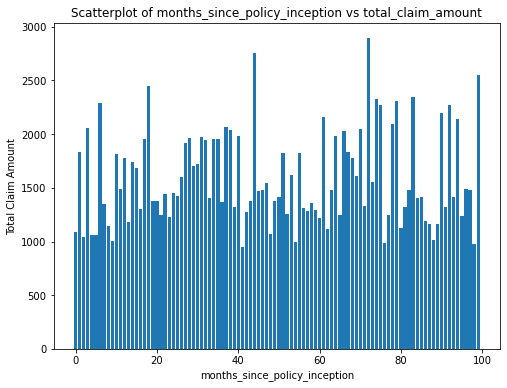

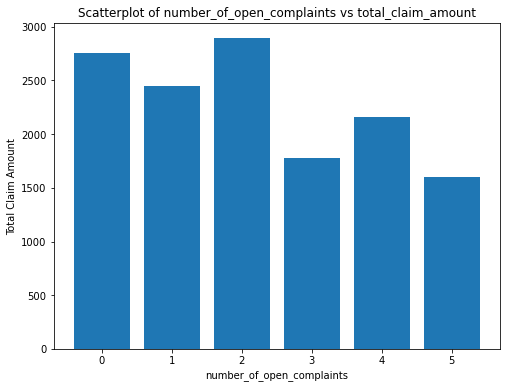

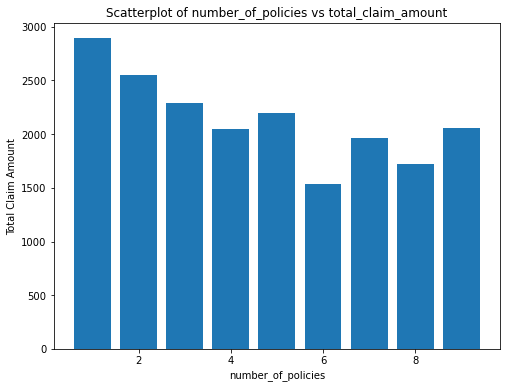

In [86]:
#7.2 Barplots

# Creating Barplots for each discrete column
for column in discrete_df:
    plt.figure(figsize=(8, 6))
    plt.bar(discrete_df[column], numerical_df['total_claim_amount'])
    plt.xlabel(column)
    plt.ylabel('Total Claim Amount')
    plt.title(f'Scatterplot of {column} vs total_claim_amount')
    plt.show()

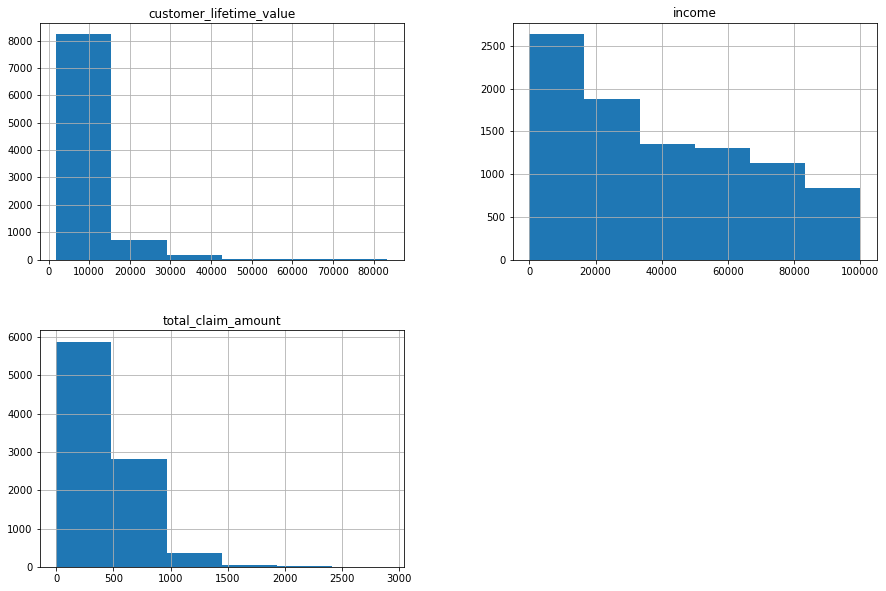

In [109]:
#7. Plot all continious variables

#7.3 Histplots
continuous_df.hist(bins=6, figsize=(15, 10))
plt.show()

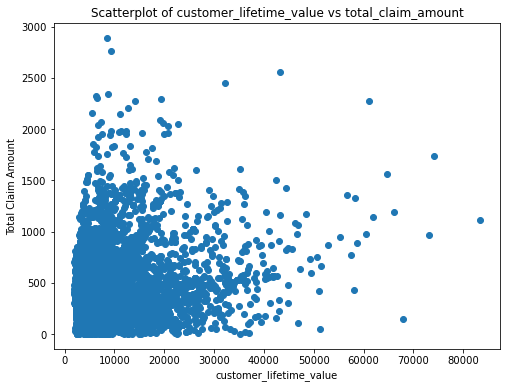

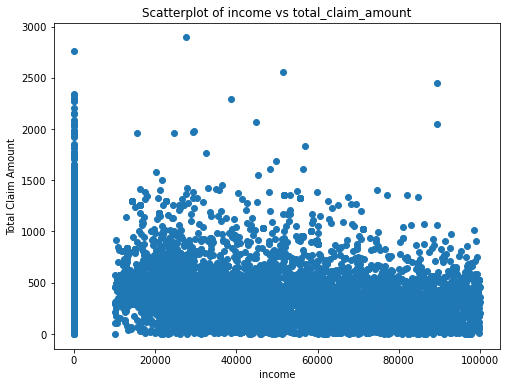

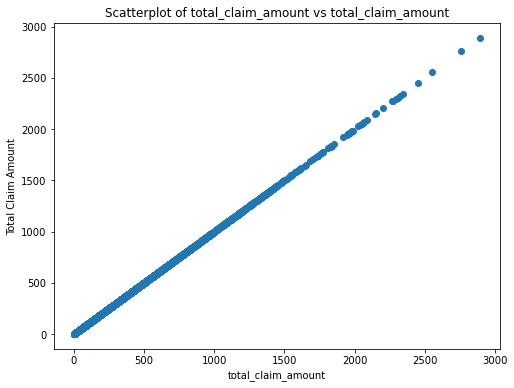

In [115]:
#7.4 Scatterplots

for column in continuous_df:
    plt.figure(figsize=(8, 6))
    plt.scatter(continuous_df[column], numerical_df['total_claim_amount'])
    plt.xlabel(column)
    plt.ylabel('Total Claim Amount')
    plt.title(f'Scatterplot of {column} vs total_claim_amount')
    plt.show()

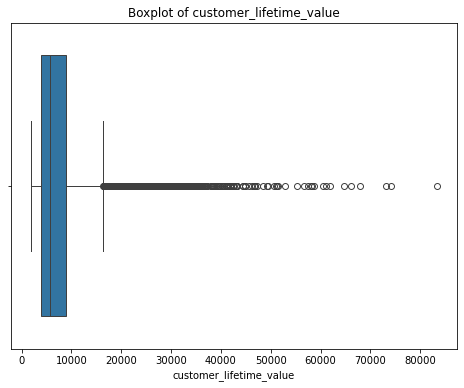

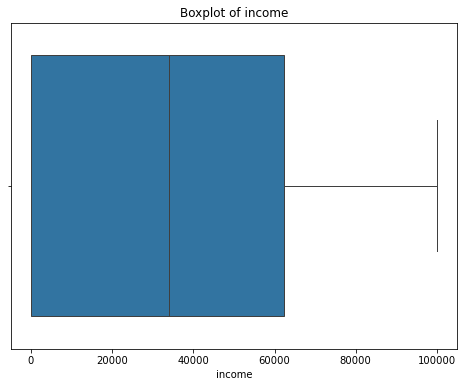

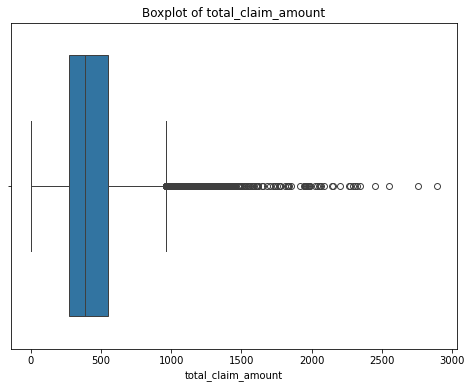

In [117]:
# 7.3 Boxplots
def boxplots(data):
    for column in data.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, x=column)
        plt.xlabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()
boxplots(continuous_df)

In [124]:
'''
Interpretation outliers:
- As I Am not preparing a regression model in this lab I would keep the outliers I can see in the scatterplots and boxplots as I
can not decide if they are important or not yet. However, I will take out the '0' values in 'income'.
'''


numerical_df.drop(numerical_df[numerical_df['income'] == 0].index, inplace=True)
numerical_df.reset_index(drop = True)
#6817 x 8

,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2011-02-24,56274,69,32,5,0,1,384.811147
1,2011-02-19,48767,108,18,38,0,2,566.472247
2,2011-02-03,43836,73,12,44,0,1,138.130879
3,2011-01-25,62902,69,14,94,0,2,159.383042
4,2011-02-24,55350,67,0,13,0,9,321.600000
...,...,...,...,...,...,...,...,...
6812,2011-02-12,66367,64,6,48,0,3,307.200000
6813,2011-01-06,47761,104,16,58,0,1,541.282007
6814,2011-02-10,71941,73,18,89,0,2,198.234764
6815,2011-02-12,21604,79,14,28,0,1,379.200000


In [125]:
# 8. Safe the new df in a csv.file

numerical_df.to_csv('numerical.csv', index=False)